# The State of COVID-19 in India


In [80]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib as mpl
from matplotlib import pyplot as plt
from ipywidgets import interact
from ipywidgets import fixed
import seaborn as sns
import calendar as cal

In [81]:
import numpy as np
import pandas as pd
#import missingno as msno
import re
import os, sys

In [82]:
import warnings
import json

warnings.filterwarnings('ignore')
sns.set_context("poster")
plt.style.use('fivethirtyeight')

s = json.load(open("../styles/bmh_matplotlibrc.json"))
plt.rcParams.update(s)

In [83]:
covid19 = pd.read_excel('../data/covid_19.xlsx')
covid19.head(100)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,2020-02-02 00:00:00,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,2020-03-02 00:00:00,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,2020-02-03 00:00:00,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,NaN,14/03/2020,59,NaN,Mumbai,Mumbai,Maharashtra,Hospitalized,Travelled from Philippines and were brought in...,NaN,India,Imported,14/03/2020,https://www.indiatoday.in/india/story/four-new...,https://www.thehindu.com/todays-paper/tp-natio...,NaN,Travel history to Philippines and were brought...
96,97,NaN,14/03/2020,NaN,NaN,Mumbai,Mumbai,Maharashtra,Hospitalized,Have international history and were brought in...,NaN,India,Imported,14/03/2020,https://www.indiatoday.in/india/story/four-new...,https://www.thehindu.com/todays-paper/tp-natio...,NaN,Have international travel history and were bro...
97,98,NaN,14/03/2020,43,M,Nagpur,Nagpur,Maharashtra,Hospitalized,"Travelled from US, travelled along with P78",P78,India,Imported,14/03/2020,https://www.indiatoday.in/india/story/1-more-t...,https://www.thehindu.com/news/national/coronav...,NaN,"Returned from US, travelled along with P78"
98,99,NaN,14/03/2020,NaN,F,Pune,Pune,Maharashtra,Hospitalized,First contacts or family members of the group ...,NaN,India,Local,14/03/2020,https://twitter.com/ANI/status/123888256798766...,https://www.hindustantimes.com/india-news/5-ne...,NaN,First contacts or family members of the group ...


In [84]:
covid19.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient Number,1619,NaN,NaN,NaN,810,467.509,1,405.5,810,1214.5,1619
State Patient Number,409,404,KL-PT-P2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date Announced,1619,33,31/03/2020,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age Bracket,618,78,21,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,741,2,M,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected City,718,199,Mumbai,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected District,1286,179,Kasaragod,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Detected State,1619,29,Maharashtra,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Status,1619,4,Hospitalized,1540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Notes,1611,528,Details awaited,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
data_copy = covid19.copy()
id(data_copy) == id(covid19)

False

In [86]:
data_copy.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [87]:
data_copy.drop(['Source_1', 'Source_2', 'Source_3'], axis=1, inplace=True)
data_copy.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Backup Notes
0,1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,Student from Wuhan
1,2,KL-AL-P1,2020-02-02 00:00:00,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,Student from Wuhan
2,3,KL-KS-P1,2020-03-02 00:00:00,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,Student from Wuhan
3,4,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,Travel history to Italy and Austria
4,5,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,2020-02-03 00:00:00,"Travel history to Dubai, Singapore contact"


## Questions

* [x] Total cases per day
* [ ] Monthly status report

In [88]:
cases_per_day = data_copy[['Date Announced', 'Patient Number']].groupby('Date Announced').sum()
print(type(pd.to_datetime(cases_per_day["Date Announced"])))


<class 'Exception'>


In [89]:
cases_per_day.reset_index(inplace=True)
print(type(cases_per_day['Date Announced']))
cases_per_day['Mon'] = cases_per_day['Date Announced'].apply(lambda x: print(x))
cases_per_day['Month'] = cases_per_day['Mon'].apply(lambda x: cal.month_abbr[x])
cases_per_day.head()

<class 'pandas.core.series.Series'>
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-04-03 00:00:00
2020-05-03 00:00:00
2020-06-03 00:00:00
2020-07-03 00:00:00
2020-08-03 00:00:00
2020-09-03 00:00:00
2020-10-03 00:00:00
2020-11-03 00:00:00
2020-12-03 00:00:00
13/03/2020
14/03/2020
15/03/2020
16/03/2020
17/03/2020
18/03/2020
19/03/2020
20/03/2020
21/03/2020
22/03/2020
23/03/2020
24/03/2020
25/03/2020
26/03/2020
27/03/2020
28/03/2020
29/03/2020
30/01/2020
30/03/2020
31/03/2020


TypeError: list indices must be integers or slices, not NoneType

In [90]:
cases_per_day['Day'] = cases_per_day['Date Announced'].apply(lambda x: x.day)

AttributeError: 'str' object has no attribute 'day'

In [91]:
data = cases_per_day.where(cases_per_day['Month'] == 'Mar').dropna()

KeyError: 'Month'

In [92]:
fig, ax = plt.subplots(1, figsize=(8,6))
_ = sns.lineplot(x='Day', y='Patient Number', data=data, ax=ax)
_ = plt.ylabel('Number of Cases', fontsize='small')
_ = plt.yticks(fontsize='small')
_ = plt.xlabel('Day of Month')
_ = plt.title('March 2020: Announced Cases by Day', fontsize='medium', loc='left')

NameError: name 'data' is not defined

In [93]:
data_copy['Month Announced'] = pd.DatetimeIndex(data_copy['Date Announced']).month
data_copy['Month Name Announced'] = data_copy['Month Announced'].apply(lambda x: cal.month_abbr[x])

In [94]:
month_summ = data_copy.groupby(['Month Name Announced'])['Current Status'].value_counts().unstack().fillna(0)

In [95]:
month_summ = np.log(month_summ[['Deceased', 'Hospitalized', 'Migrated', 'Recovered']])

In [96]:
month_summ.replace([np.inf, -np.inf], 0, inplace=True)

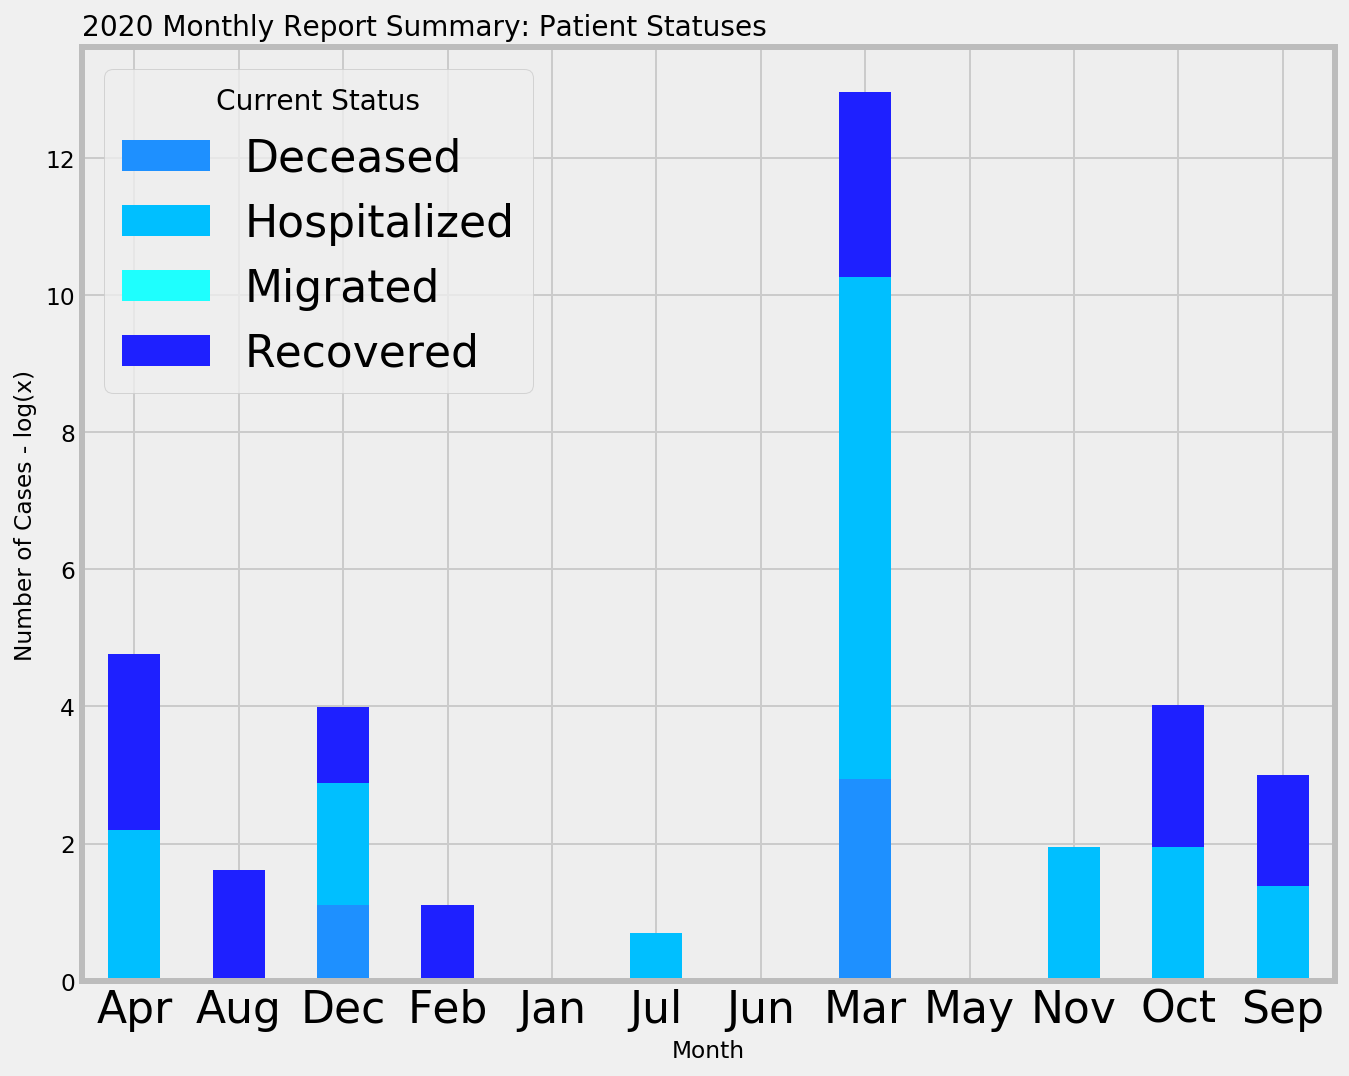

In [97]:
fig, ax = plt.subplots(1, figsize=(10,8))
_ = month_summ.plot(kind='bar', stacked=True, rot=0,
                    color=[ '#1e90ff', '#00bfff', '#1efffe', '#1e20ff'], ax=ax)
_ = plt.ylabel('Number of Cases - log(x)', fontsize='small')
_ = plt.yticks(fontsize='small')
_ = plt.xlabel('Month')
_ = plt.title('2020 Monthly Report Summary: Patient Statuses', fontsize='medium', loc='left')

The y-axis viewed in the form of log-scale because March figures were skewing the results. This visualization is only meant to show the general pattern, not exact figures.